In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# split valdation and test images
x_val, y_val = x_validation[: 9000], y_validation[: 9000]
x_test, y_test = x_validation[: 1000], y_validation[: 1000]

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

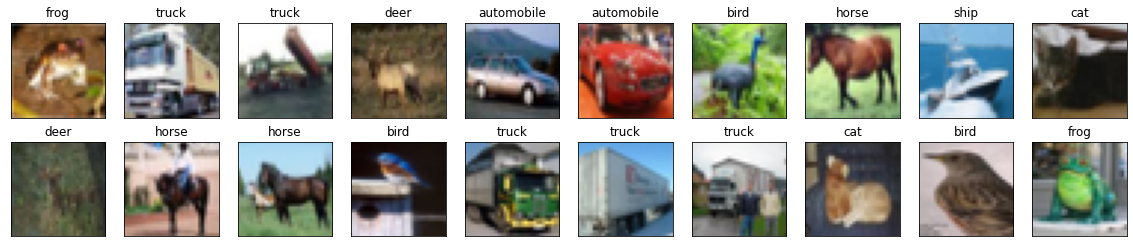

In [ ]:
# Show some training images

fig = plt.figure(figsize=(20, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(x_train[idx])
  plt.title(class_names[int(y_train[idx])])

In [ ]:
print("Number of Training Samples: ", len(x_train))
print("Number of Validation Samples: ", len(x_val))
print("Number of Test Samples: ", len(x_test))

Number of Training Samples:  50000
Number of Validation Samples:  9000
Number of Test Samples:  1000


In [ ]:
#train_labels = to_categorical(train_labels, 10)
#test_labels = to_categorical(test_labels, 10)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(50000, 1)
(9000, 1)
(1000, 1)


In [ ]:
# change data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalize data into range 1-0
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

In [ ]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)
print("Testing shape: ", x_test.shape)

Training shape:  (50000, 32, 32, 3)
Validation shape:  (9000, 32, 32, 3)
Testing shape:  (1000, 32, 32, 3)


In [ ]:
input_shape = (32, 32, 3)
batch_size = 32
epochs = 15

In [ ]:
model = Sequential()

 # start 1st block
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu',input_shape = input_shape, padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
# end 1st block

# start 2nd block
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

# end 2nd block

# start 3rd block
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
# end 3rd block

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 10, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [ ]:
# initiate RMSprop optimizer and configure some parameters
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
          validation_data = (x_val, y_val),
          batch_size=25,
          epochs=15,
          shuffle=True)

Epoch 1/15
2000/2000 [==============================] - 14s 7ms/step - loss: 1.4982 - accuracy: 0.4778 - val_loss: 1.1237 - val_accuracy: 0.5982
Epoch 2/15
2000/2000 [==============================] - 14s 7ms/step - loss: 1.0462 - accuracy: 0.6275 - val_loss: 0.9274 - val_accuracy: 0.6714
Epoch 3/15
2000/2000 [==============================] - 14s 7ms/step - loss: 0.8387 - accuracy: 0.7028 - val_loss: 0.8679 - val_accuracy: 0.6927
Epoch 4/15
2000/2000 [==============================] - 14s 7ms/step - loss: 0.6970 - accuracy: 0.7526 - val_loss: 0.7576 - val_accuracy: 0.7371
Epoch 5/15
2000/2000 [==============================] - 14s 7ms/step - loss: 0.5827 - accuracy: 0.7950 - val_loss: 0.7369 - val_accuracy: 0.7488
Epoch 6/15
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4878 - accuracy: 0.8290 - val_loss: 0.6916 - val_accuracy: 0.7603
Epoch 7/15
2000/2000 [==============================] - 14s 7ms/step - loss: 0.4023 - accuracy: 0.8597 - val_loss: 0.6696 - val_ac

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#model.save('drive/My Drive/CNN Models/Adversrial Patch Solution/cifar10_adversrial_patch_tf.h5')

In [ ]:
model = keras.models.load_model('drive/My Drive/CNN Models/Adversrial Patch Solution/cifar10_adversrial_patch_tf.h5')

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

In [ ]:
print("Test Accuracy: ", round(acc, 2) * 100, '%')
print("Test Loss: ", round(loss, 2))

Test Accuracy:  79.00000214576721 %
Test Loss:  0.71


In [ ]:
predictions = model.predict(x_test)
#np.argmax(predictions[0])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


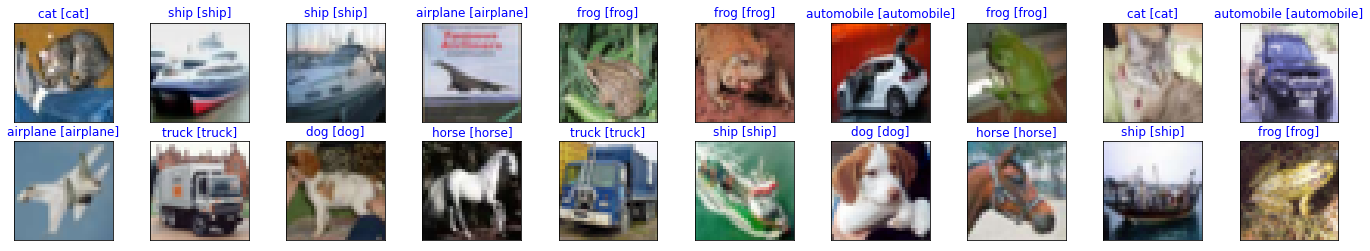

In [ ]:
#show some test images

fig = plt.figure(figsize=(24, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(x_test[idx])
  if class_names[int(np.argmax(predictions[idx]))] == class_names[int(y_test[idx])]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[int(y_test[idx])] + " [" + class_names[int(np.argmax(predictions[idx]))] + "]", color = color)

**Create Adversarial Attack**

In [ ]:
#!pip install foolbox==2.4.0

import foolbox

In [ ]:
pred = model.predict(x_test[16].reshape(1, 32, 32, 3))
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))
y_pred = np.argmax(pred)
l = y_pred.reshape(1)


# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.SinglePixelAttack(model = fmodel, criterion = c, distance = d)


adv_img = attack(inputs = x_test[16].reshape(1, 32, 32, 3), labels = l)
adv_diff = adv_img - x_test[16]

In [ ]:
adv_pred = model.predict(adv_img)
y_adv_pred = np.argmax(adv_pred)
y_adv_pred 

2

In [ ]:
# reconstruction
adv_recons = x_test[16] + 0.003 * adv_img
pred_recons = model.predict(adv_recons)
y_pred_recons = np.argmax(pred_recons)

([], <a list of 0 Text major ticklabel objects>)

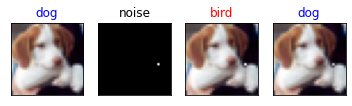

In [ ]:
plt.subplot(1, 4, 1)
plt.imshow(x_test[16])
plt.title(class_names[y_pred], color = 'blue')
plt.xticks([])
plt.yticks([])


plt.subplot(1, 4, 2)
plt.imshow(np.clip(adv_diff.reshape(32, 32, 3), 0, 1))
plt.title('noise')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 3)
plt.imshow(np.clip(adv_img.reshape(32, 32, 3), 0, 1))
plt.title(class_names[y_adv_pred], color = 'red')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(np.clip(adv_recons.reshape(32, 32, 3), 0, 1))
plt.title(class_names[y_pred_recons], color = 'blue')
plt.xticks([])
plt.yticks([])

## 1. Fast Gradient Sign Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.FGSM(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []
adv_difference = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  adv_diff = adv - x_test[idx]
  adv_difference.append(adv_diff)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)



In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)
adv_difference = np.asarray(adv_difference)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 6ms/step - loss: 7.4829 - accuracy: 0.1260

Model accuraccy on Adversarial Example:  0.13 %
Model loss on Adversarial Example:  7.48


([], <a list of 0 Text major ticklabel objects>)

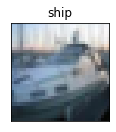

In [ ]:
# predict some original image
x_test_pred = model.predict(x_test)
# predict some adversarial example
adv_pred = model.predict(adv_examples)


# show test images
plt.subplot(1, 1, 1)
plt.imshow(x_test[0])
plt.title(class_names[np.argmax(x_test_pred[0])])
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(x_test[1])
plt.title(class_names[np.argmax(x_test_pred[1])])
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(x_test[2])
plt.title(class_names[np.argmax(x_test_pred[2])])
plt.xticks([])
plt.yticks([])


In [ ]:
adv_difference = adv_difference.reshape(1000, 32, 32, 3)
adv_difference.shape

(1000, 32, 32, 3)

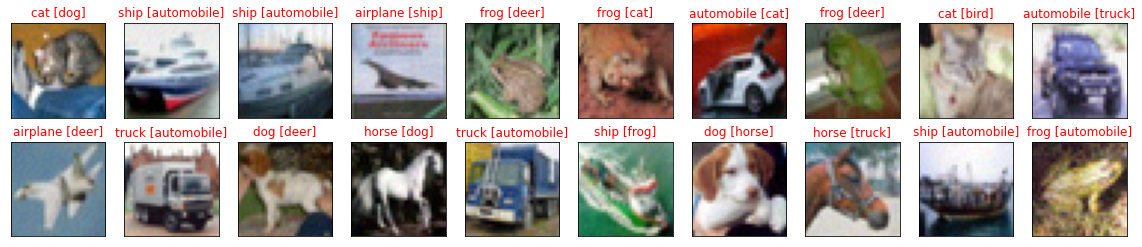

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

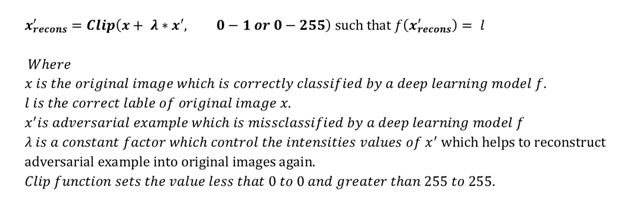

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.8585 - accuracy: 0.7870

Accuracy of Model on Reconstructed Adversarial Example:  79.0 %
Loss of Model on Reconstructed Adversarial Example:  0.8585


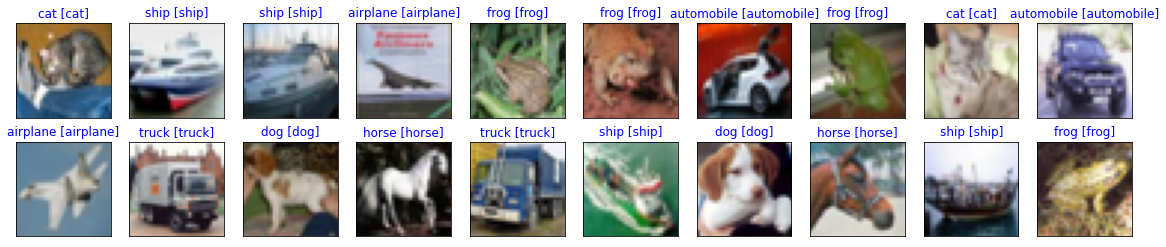

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 2. Basic Iterative Method and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.BIM(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)



In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 3ms/step - loss: 1.0165 - accuracy: 0.1330

Model accuraccy on Adversarial Example:  0.13 %
Model loss on Adversarial Example:  1.02


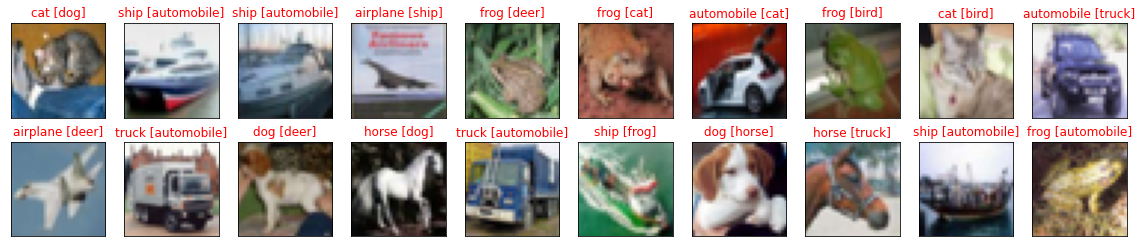

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

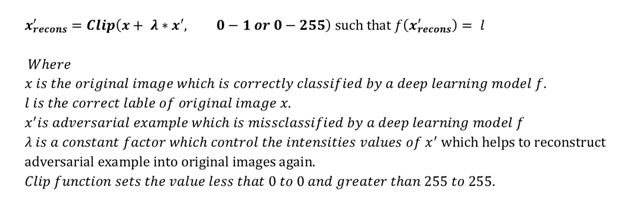

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.7900

Accuracy of Model on Reconstructed Adversarial Example:  79.0 %
Loss of Model on Reconstructed Adversarial Example:  0.7134


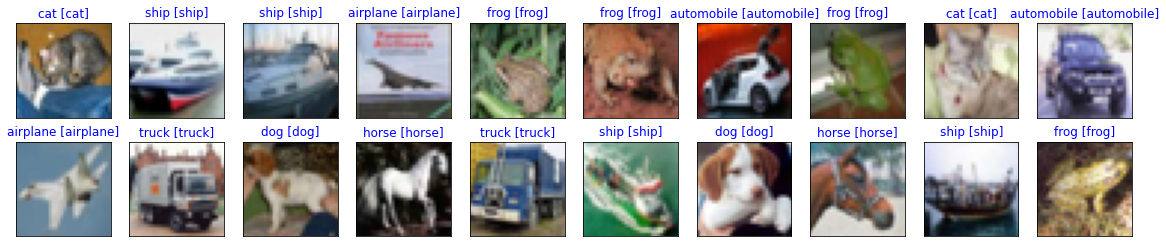

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 3. Projected Descent Gradient Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.ProjectedGradientDescentAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)



In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 3ms/step - loss: 1.0031 - accuracy: 0.1300

Model accuraccy on Adversarial Example:  0.13 %
Model loss on Adversarial Example:  1.0


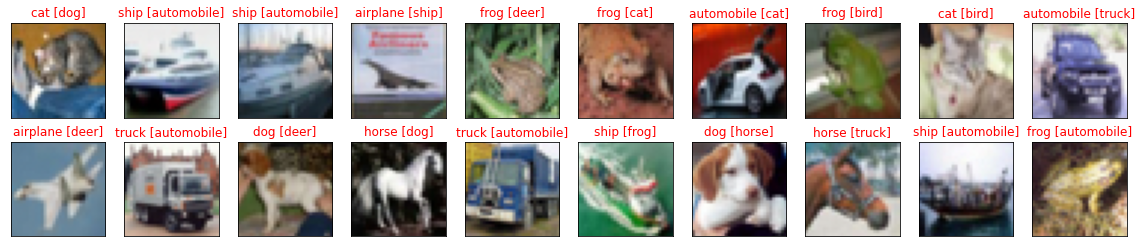

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

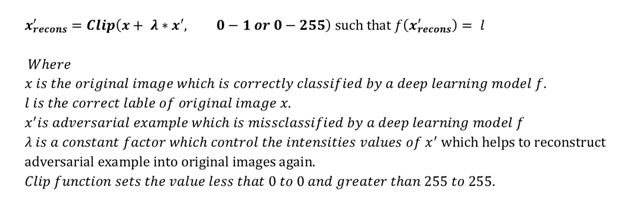

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.7900

Accuracy of Model on Reconstructed Adversarial Example:  79.0 %
Loss of Model on Reconstructed Adversarial Example:  0.7134


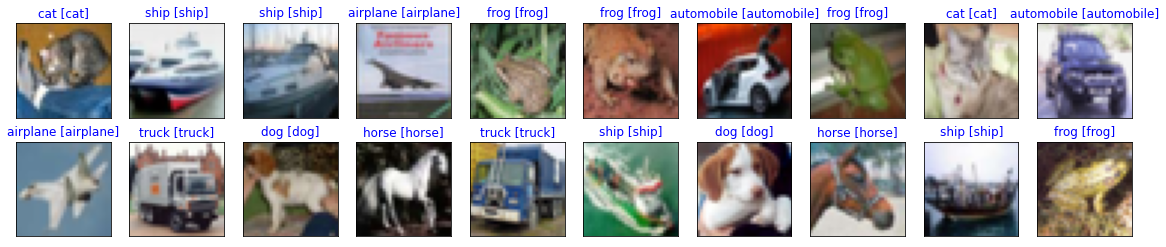

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 4. Momentum Iterative Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.MomentumIterativeAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)



In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 3ms/step - loss: 1.2957 - accuracy: 0.1310

Model accuraccy on Adversarial Example:  0.13 %
Model loss on Adversarial Example:  1.3


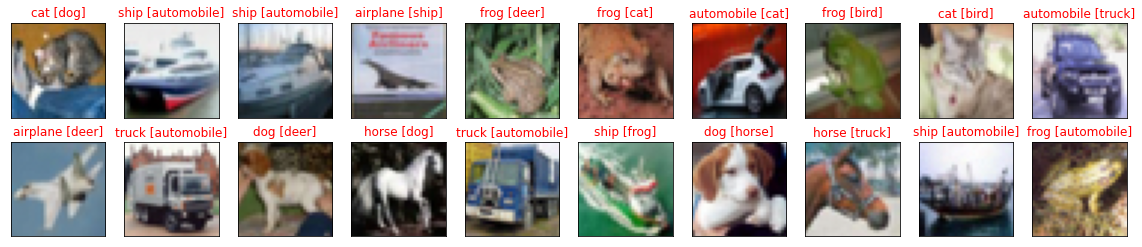

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

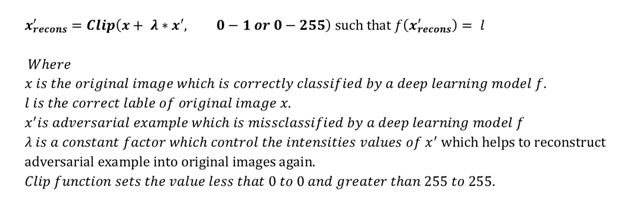

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 1.0004 - accuracy: 0.7760

Accuracy of Model on Reconstructed Adversarial Example:  78.0 %
Loss of Model on Reconstructed Adversarial Example:  1.0004


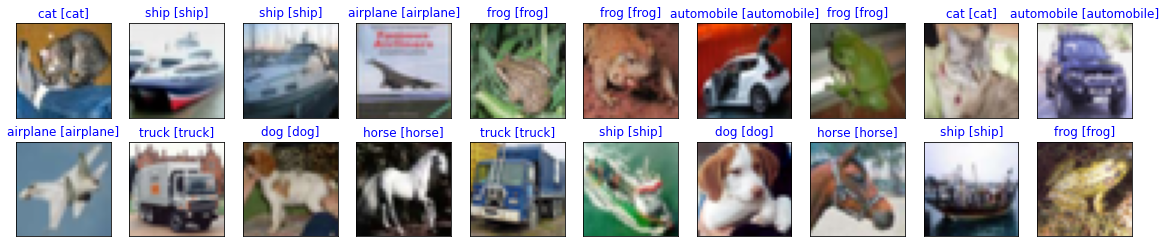

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 5. Deep Fool Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.DeepFoolAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)



In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 3ms/step - loss: 148.6633 - accuracy: 0.1260

Model accuraccy on Adversarial Example:  0.13 %
Model loss on Adversarial Example:  148.66


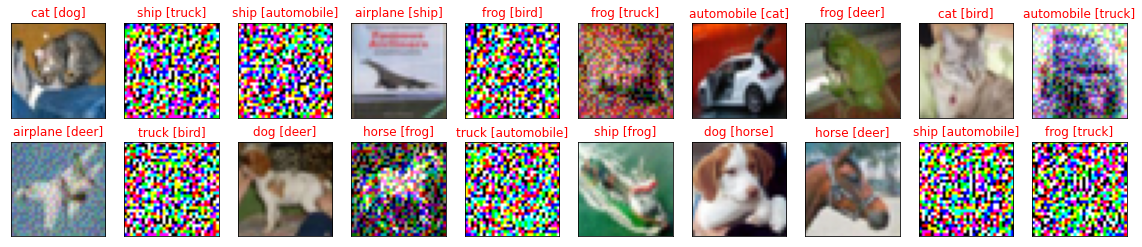

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

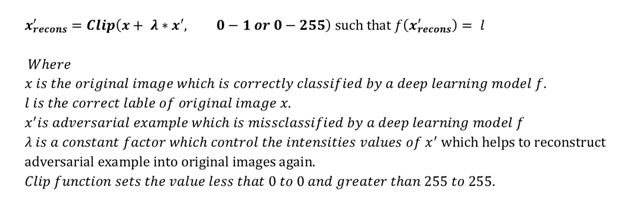

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.00001

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 2ms/step - loss: 0.8487 - accuracy: 0.7830

Accuracy of Model on Reconstructed Adversarial Example:  78.0 %
Loss of Model on Reconstructed Adversarial Example:  0.8487


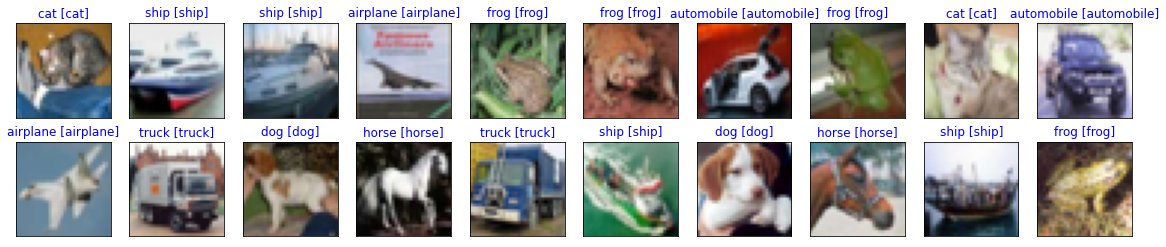

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 6. Newton Fool Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.NewtonFoolAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 3ms/step - loss: 1.4185 - accuracy: 0.3390

Model accuraccy on Adversarial Example:  0.34 %
Model loss on Adversarial Example:  1.42


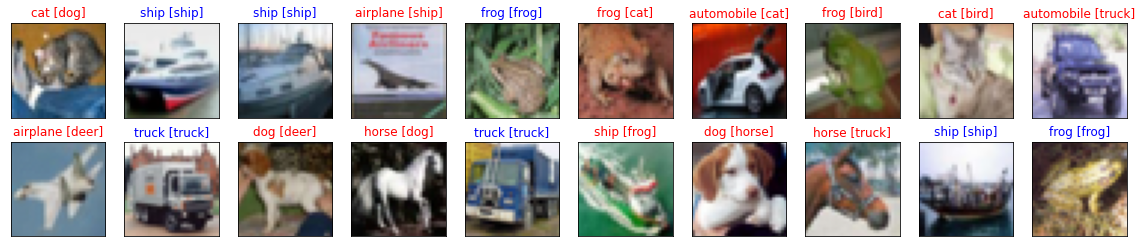

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

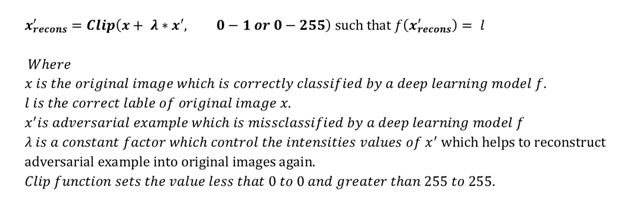

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.7900

Accuracy of Model on Reconstructed Adversarial Example:  79.0 %
Loss of Model on Reconstructed Adversarial Example:  0.7213


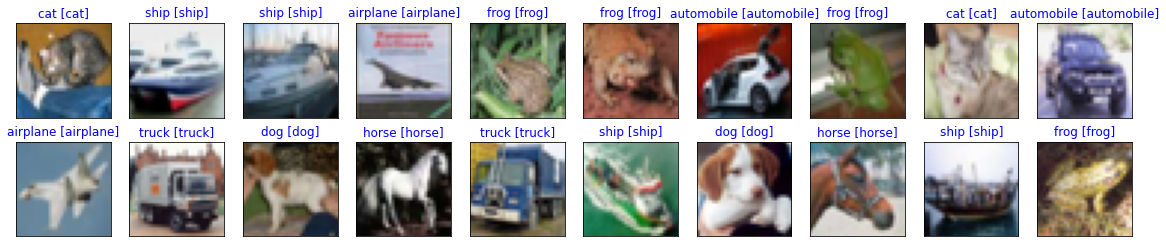

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 7. ADef(Adversarial Deformation) Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.ADefAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)



In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 3ms/step - loss: 4.1688 - accuracy: 0.1570

Model accuraccy on Adversarial Example:  0.16 %
Model loss on Adversarial Example:  4.17


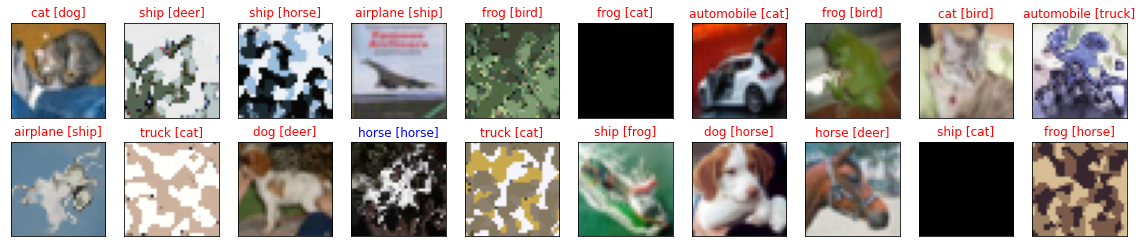

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

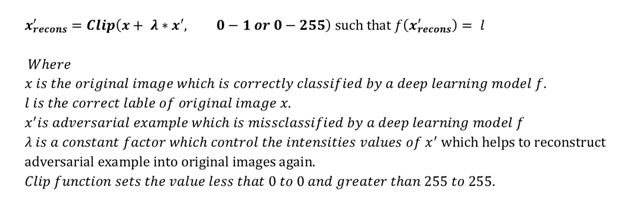

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 2ms/step - loss: 1.5007 - accuracy: 0.7350

Accuracy of Model on Reconstructed Adversarial Example:  74.0 %
Loss of Model on Reconstructed Adversarial Example:  1.5007


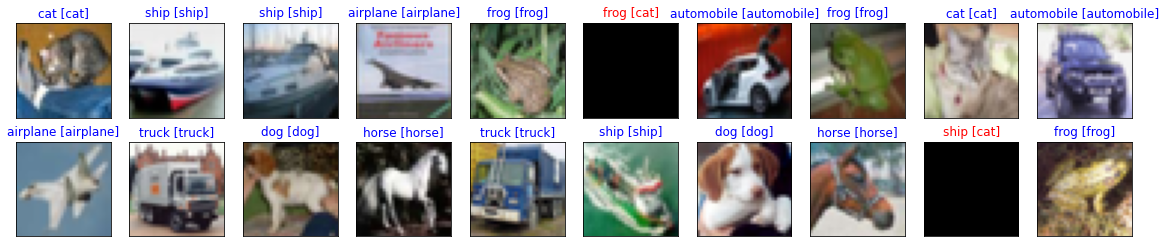

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 8. Saliency Map Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.SaliencyMapAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []
jsma_noise = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)
  jsma_noise.append(adv - x_test[idx])

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:95: UserWarning: GradientAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  " attack.".format(self.name())


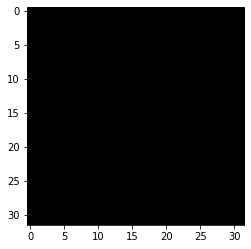

In [ ]:
jsma_noise = np.asarray(jsma_noise)
jsma_noise = jsma_noise.reshape(1000, 32, 32, 3)


plt.imshow(jsma_noise[0].reshape(32, 32, 3))

In [ ]:
import pickle
f = open('./drive/My Drive/jsma_cifar10_nosie.pickle', 'wb')
jsma = pickle.dump(jsma_noise, f)

In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))


Model accuraccy on Adversarial Example:  0.13 %
Model loss on Adversarial Example:  1.21


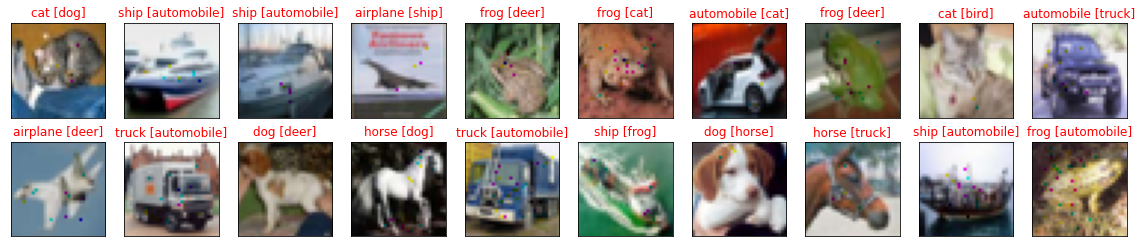

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

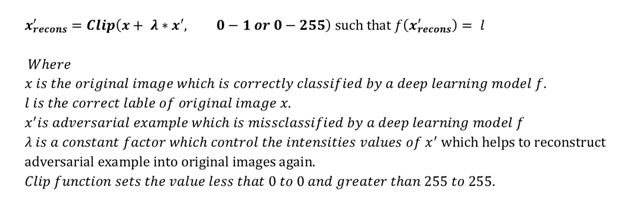

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.7125 - accuracy: 0.7920

Accuracy of Model on Reconstructed Adversarial Example:  79.0 %
Loss of Model on Reconstructed Adversarial Example:  0.7125


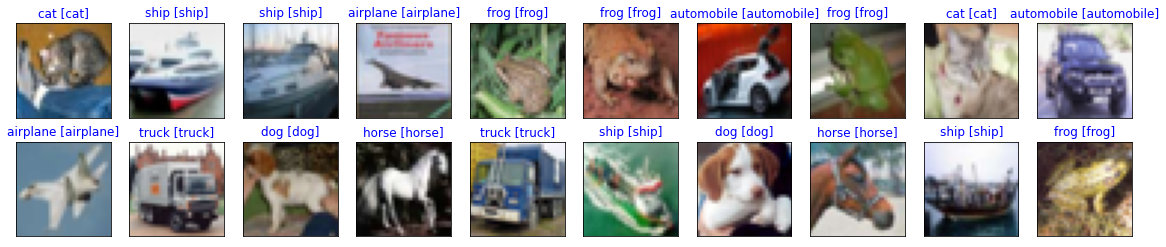

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Scroe Based Attacks**

## 9. Single Pixel Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.MeanSquaredDistance

# create attack
attack = foolbox.attacks.SinglePixelAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

Using TensorFlow backend.


In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 2s 61ms/step - loss: 823.7806 - accuracy: 0.0510

Model accuraccy on Adversarial Example:  0.05 %
Model loss on Adversarial Example:  823.78


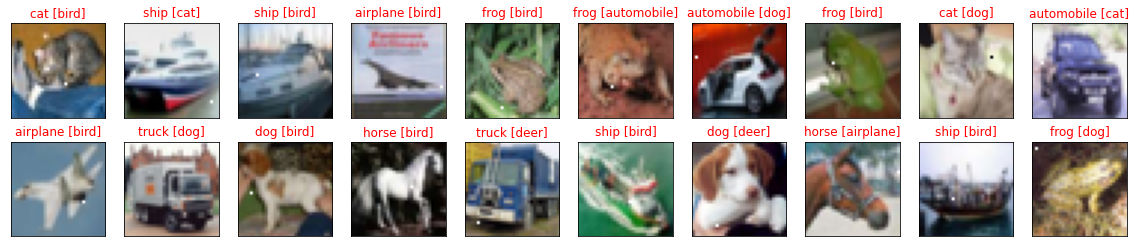

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

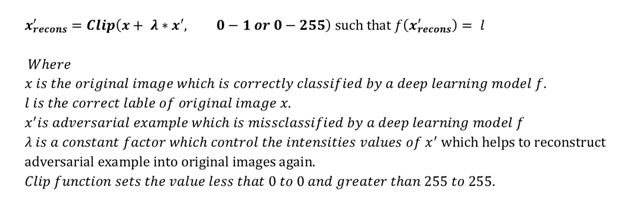

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.001

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 2s 60ms/step - loss: 0.7190 - accuracy: 0.7840

Accuracy of Model on Reconstructed Adversarial Example:  78.0 %
Loss of Model on Reconstructed Adversarial Example:  0.719


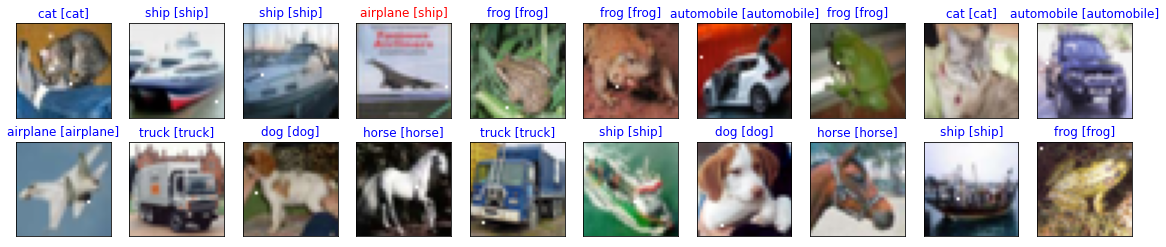

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

## 10. Saptial  Attack and Reconstruction of Adversarial Example

In [ ]:
# create fool model
fmodel = foolbox.models.KerasModel(model = model, bounds = (0, 255))

# create criteria and distnce of adversarial example
c = foolbox.criteria.Misclassification()
d = foolbox.distances.Linfinity

# create attack
attack = foolbox.attacks.SpatialAttack(model = fmodel, criterion = c, distance = d)

# create adversarial examples
adv_examples = []

for idx in np.arange(len(x_test)):
  y_pred = np.argmax(predictions[idx])
  l = y_pred.reshape(1)
  adv = None
  adv = attack(inputs = x_test[idx].reshape(1, 32, 32, 3), labels = l)
  if adv is None:
    print('Warning: Unable to find adversarial example for image at index: ', idx)
  adv_examples.append(adv)

Using TensorFlow backend.


In [ ]:
# convert adv_examples list into numpy array
adv_examples = np.asarray(adv_examples)


adv_examples = adv_examples.reshape(1000, 32, 32, 3)

# evaluate the loss and accuracy of our model on adversarial examples.
loss, accuracy = model.evaluate(adv_examples, y_test)

print()
print("Model accuraccy on Adversarial Example: ", round(accuracy, 2), "%")
print("Model loss on Adversarial Example: ", round(loss, 2))

32/32 [==============================] - 0s 3ms/step - loss: 3.3794 - accuracy: 0.0570

Model accuraccy on Adversarial Example:  0.06 %
Model loss on Adversarial Example:  3.38


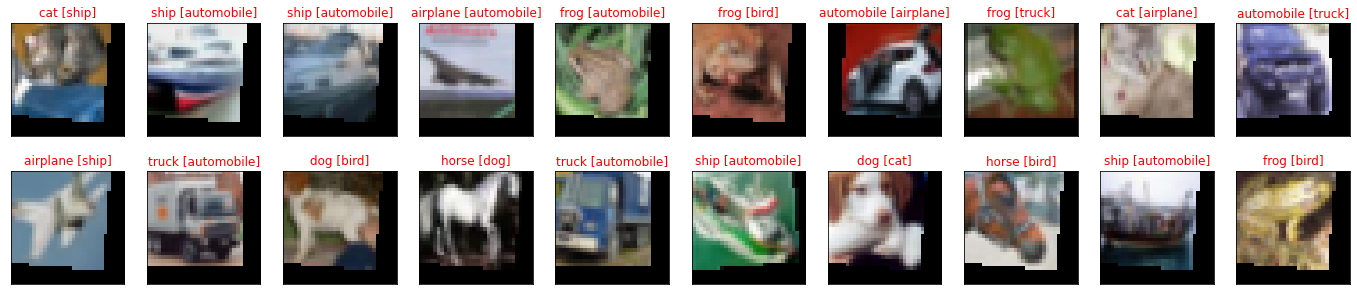

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_examples)


# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_examples[idx].reshape(32, 32, 3), 0, 1), cmap = 'gray')
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Reconstruction of Adversarial Examples**

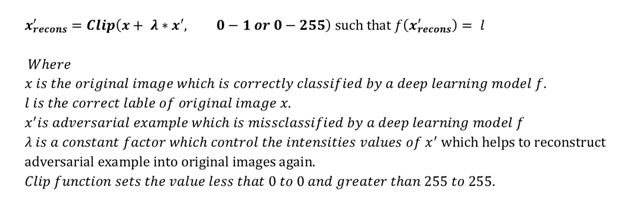

In [ ]:
# take original images
x = x_test

# take adversarial 
x_adv = adv_examples

# take lamda to control the instensities
lambda_ = 0.003

adv_example_recons = []

# lets start reconstruct
for idx in np.arange(len(x_adv)):
  adv_recons = x[idx] + lambda_* x_adv[idx]
  adv_example_recons.append(adv_recons)

# convert from list to numpy array
adv_example_recons = np.asarray(adv_example_recons)

**Test reconstructed adversarial example by model to check its Accuracy and Loss**

In [ ]:
# applying our model on reconstructed adversarial examples
loss, accuracy = model.evaluate(adv_example_recons, y_test)

# accuracy and loss of model recovered due to reconstruction of adversarial Example
print() 
print("Accuracy of Model on Reconstructed Adversarial Example: ", round(accuracy, 2)*100, '%')
print("Loss of Model on Reconstructed Adversarial Example: ", round(loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.7142 - accuracy: 0.7910

Accuracy of Model on Reconstructed Adversarial Example:  79.0 %
Loss of Model on Reconstructed Adversarial Example:  0.7142


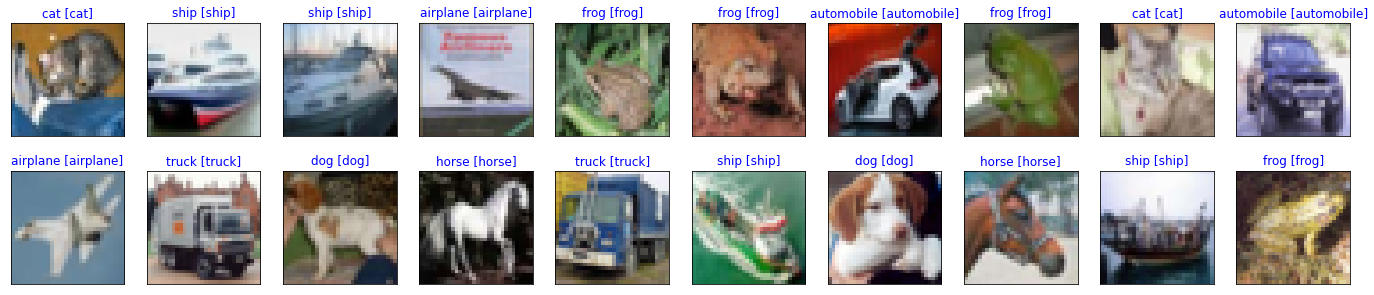

In [ ]:
# predict some adversarial example
predictions = model.predict(adv_example_recons)


# show test images
fig = plt.figure(figsize = (24, 5))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(adv_example_recons[idx].reshape(32, 32, 3), 0, 1))
  
  if class_names[int(y_test[idx])] == class_names[int(np.argmax(predictions[idx]))]:
    color = 'blue'
  else:
    color = 'red'

  plt.title(class_names[int(y_test[idx])] + ' [' + class_names[int(np.argmax(predictions[idx]))] + ']', color = color)

**Scroe Based Attacks**